In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import seaborn as sns
from utils import *
import warnings
warnings.filterwarnings('ignore') 

2025-03-12 20:07:58.970 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
# match_df = pd.read_csv("C:/Users/Prashanth/Documents/Workspace/IPL/matches.csv")
# player_mapping = pd.read_csv("C:/Users/Prashanth/Documents/Workspace/IPL/Player_map.csv")
# team_mapping = pd.read_csv("C:/Users/Prashanth/Documents/Workspace/IPL/Team_map.csv")
# delivery_df = pd.read_csv("C:/Users/Prashanth/Documents/Workspace/IPL/deliveries.csv")

match_df,player_mapping,team_mapping,delivery_df = load_data()

2025-03-12 20:07:58.979 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-12 20:07:58.979 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 20:07:59.522 
  command:

    streamlit run c:\Users\Prashanth\miniconda3\envs\cobra\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-12 20:07:59.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 20:07:59.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 20:08:00.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 20:08:00.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [3]:
delivery_df['dismissal_kind_old'] = delivery_df['dismissal_kind'] 
delivery_df['dismissal_kind'] = [i if i in ['caught','bowled','run out','lbw','caught and bowled','stumped'] else 'NA' for i in delivery_df['dismissal_kind_old']]
delivery_df['dismissal'] = [1 if i in ['caught','bowled','run out','lbw','caught and bowled','stumped'] else 0 for i in delivery_df['dismissal_kind_old']]

In [4]:
team_mapping['team_input'] = team_mapping.apply(lambda row: f"{row['Team']} ({row['Team_Short']})", axis=1)
team_input_names = team_mapping['team_input'].to_list()

team_1_ = "Chennai Super Kings (CSK)"
team_2_ = "Mumbai Indians (MI)"

team_1 = team_mapping[team_mapping['team_input']==team_1_]['Team'].values[0]
team_2 = team_mapping[team_mapping['team_input']==team_2_]['Team'].values[0]

team_1_short = team_mapping[team_mapping['team_input']==team_1_]['Team_Short'].values[0]
team_2_short = team_mapping[team_mapping['team_input']==team_2_]['Team_Short'].values[0]

selected_players_df = player_mapping[player_mapping['Team'].isin([team_1,team_2])].reset_index(drop=True)
player_team_1_df = player_mapping[player_mapping['Team'].isin([team_1])].reset_index(drop=True)
player_team_2_df = player_mapping[player_mapping['Team'].isin([team_2])].reset_index(drop=True)

player_team_1_list = player_team_1_df['new_player_names'].unique()
player_team_2_list = player_team_2_df['new_player_names'].unique()

In [5]:
team_1_batting = delivery_df[(delivery_df['batter'].isin(player_team_1_list)) & (delivery_df['bowler'].isin(player_team_2_list))].reset_index(drop=True)
team_1_batting_metrics = calculate_batsman_metrics(team_1_batting)

team_2_batting = delivery_df[(delivery_df['batter'].isin(player_team_2_list)) & (delivery_df['bowler'].isin(player_team_1_list))].reset_index(drop=True)
team_2_batting_metrics = calculate_batsman_metrics(team_2_batting)

# team_1_batting_metrics.to_csv('C:/Users/Prashanth/Documents/Workspace/IPL/team_1_batting_metrics.csv')
# team_2_batting_metrics.to_csv('C:/Users/Prashanth/Documents/Workspace/IPL/team_2_batting_metrics.csv')

In [6]:
team_1_bowling = delivery_df[delivery_df['bowler'].isin(player_team_1_list) & (delivery_df['batter'].isin(player_team_2_list))].reset_index(drop=True)
team_1_bowling_metrics = calculate_bowler_metrics(team_1_bowling)

team_2_bowling = delivery_df[delivery_df['bowler'].isin(player_team_2_list) & (delivery_df['batter'].isin(player_team_1_list))].reset_index(drop=True)
team_2_bowling_metrics = calculate_bowler_metrics(team_2_bowling)

# team_1_bowling_metrics.to_csv('C:/Users/Prashanth/Documents/Workspace/IPL/team_1_bowling_metrics.csv')
# team_2_bowling_metrics.to_csv('C:/Users/Prashanth/Documents/Workspace/IPL/team_2_bowling_metrics.csv')

In [7]:
selected_player = 'Ravichandran Ashwin'
bowler_plot_data = team_1_bowling_metrics[team_1_bowling_metrics['bowler']==selected_player]
batter_plot_data = team_1_batting_metrics[team_1_batting_metrics['batter']==selected_player]

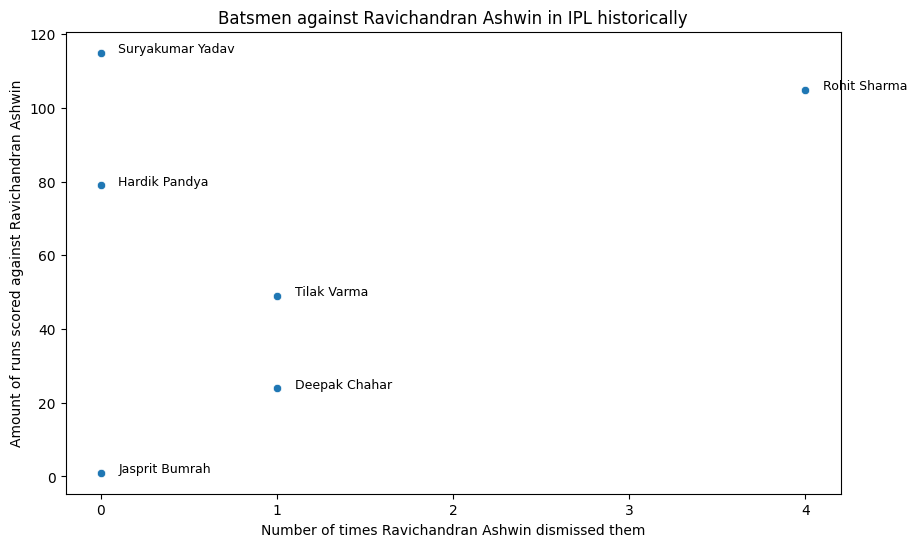

In [8]:
selected_player_bowling_plot_1 = selected_player_bowling_1(bowler_plot_data,selected_player)
selected_player_bowling_plot_1

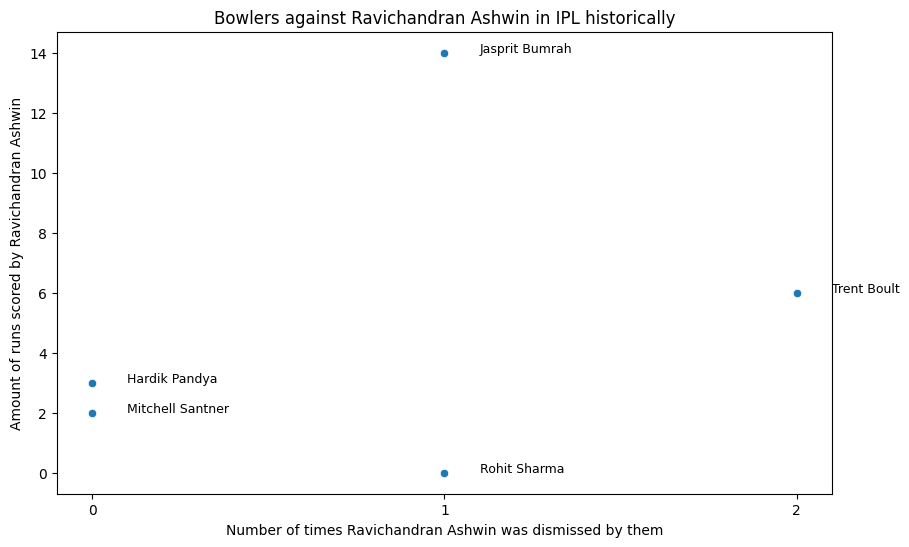

In [9]:
selected_player_batting_plot_1 = selected_player_batting_1(batter_plot_data,selected_player)
selected_player_batting_plot_1

In [12]:
selected_player = 'Ravichandran Ashwin'
bowler_plot_data = team_1_bowling_metrics[team_1_bowling_metrics['bowler']==selected_player]
batter_plot_data = team_1_batting_metrics[team_1_batting_metrics['batter']==selected_player]
selected_player_bowling_plot_1 = selected_player_bowling_1(bowler_plot_data,selected_player)
selected_player_batting_plot_1 = selected_player_batting_1(batter_plot_data,selected_player)


In [13]:
team_1_selected_plater = 'Ravichandran Ashwin'
team_1_selected_plater_bowler_plot_data = team_1_bowling_metrics[team_1_bowling_metrics['bowler']==team_1_selected_plater]
team_1_selected_plater_batter_plot_data = team_1_batting_metrics[team_1_batting_metrics['batter']==team_1_selected_plater]
selected_player_bowling_plot_1 = selected_player_bowling_1(team_1_selected_plater_bowler_plot_data,team_1_selected_plater)
selected_player_batting_plot_1 = selected_player_batting_1(team_1_selected_plater_batter_plot_data,team_1_selected_plater)

In [19]:
team_1_bowling_metrics['bowler'].unique()

array(['Deepak Hooda', 'Kamlesh Nagarkoti', 'Khaleel Ahmed',
       'Matheesha Pathirana', 'Mukesh Choudhary', 'Nathan Ellis',
       'Noor Ahmad', 'Ravichandran Ashwin', 'Ravindra Jadeja',
       'Sam Curran', 'Shreyas Gopal', 'Vijay Shankar'], dtype=object)

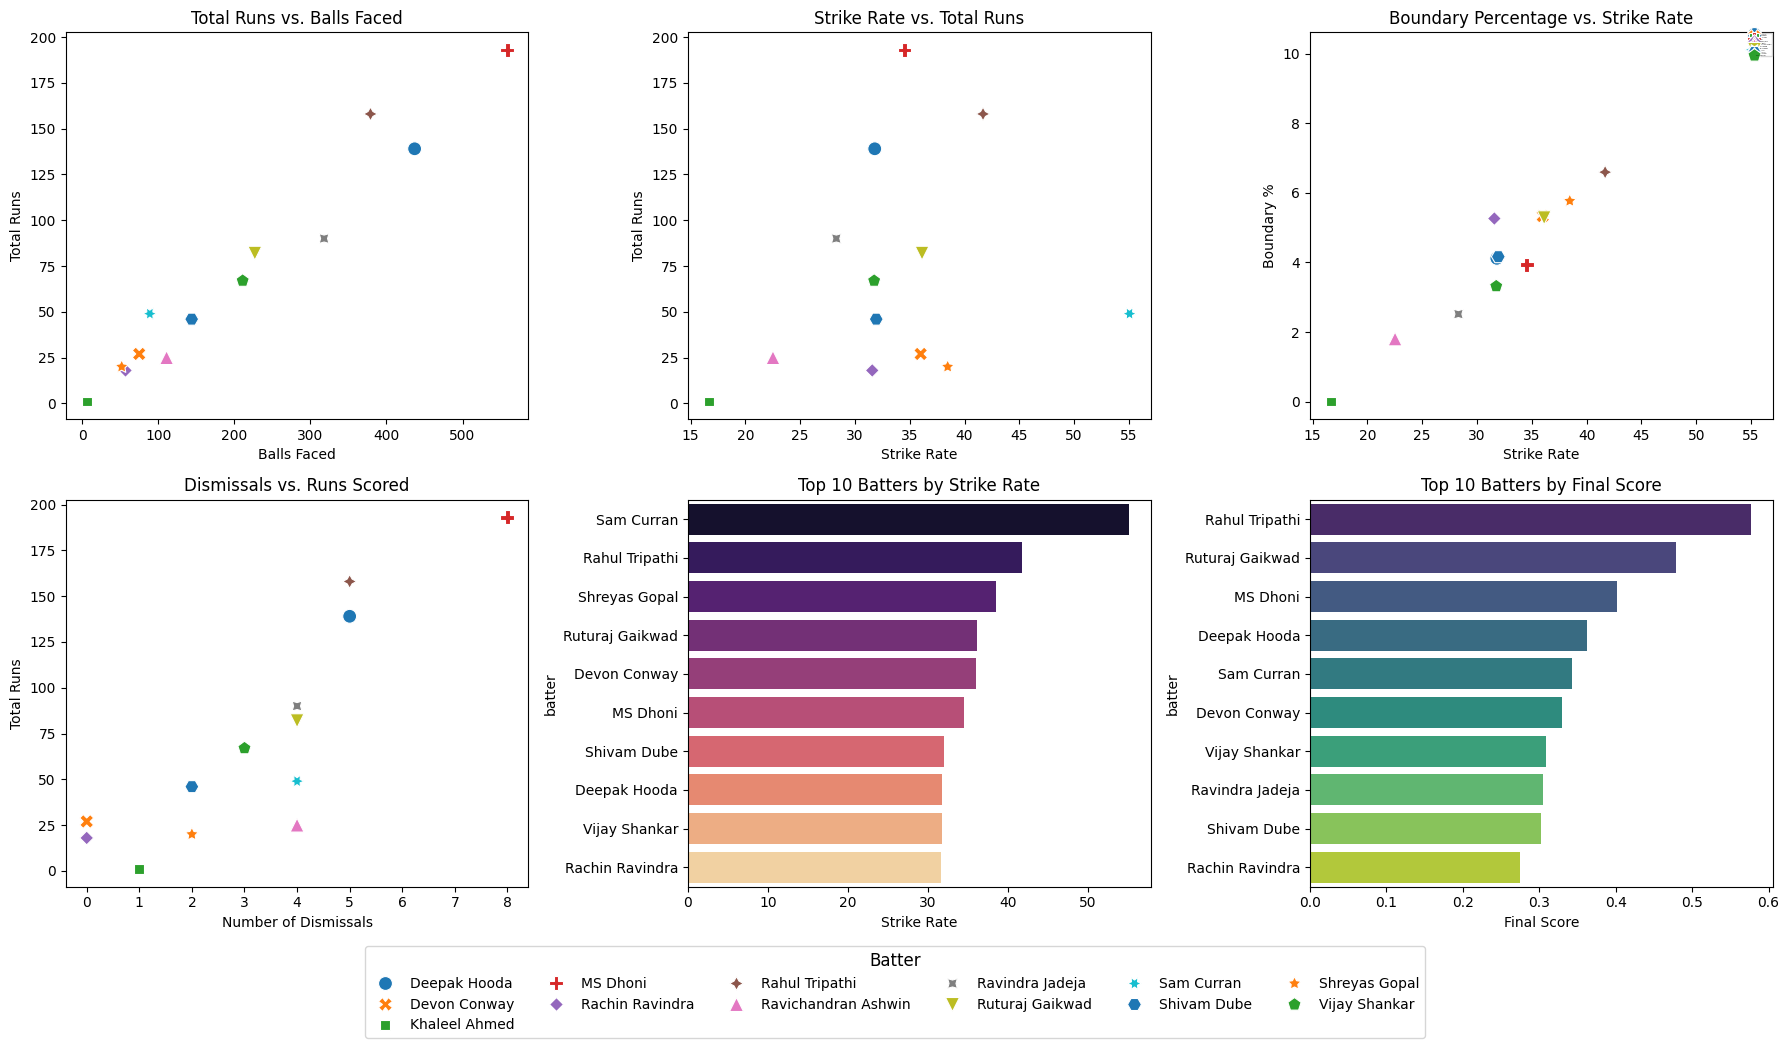

In [10]:
batter_level_plots = create_batter_effectiveness_plots(team_1_batting_metrics)
batter_level_plots

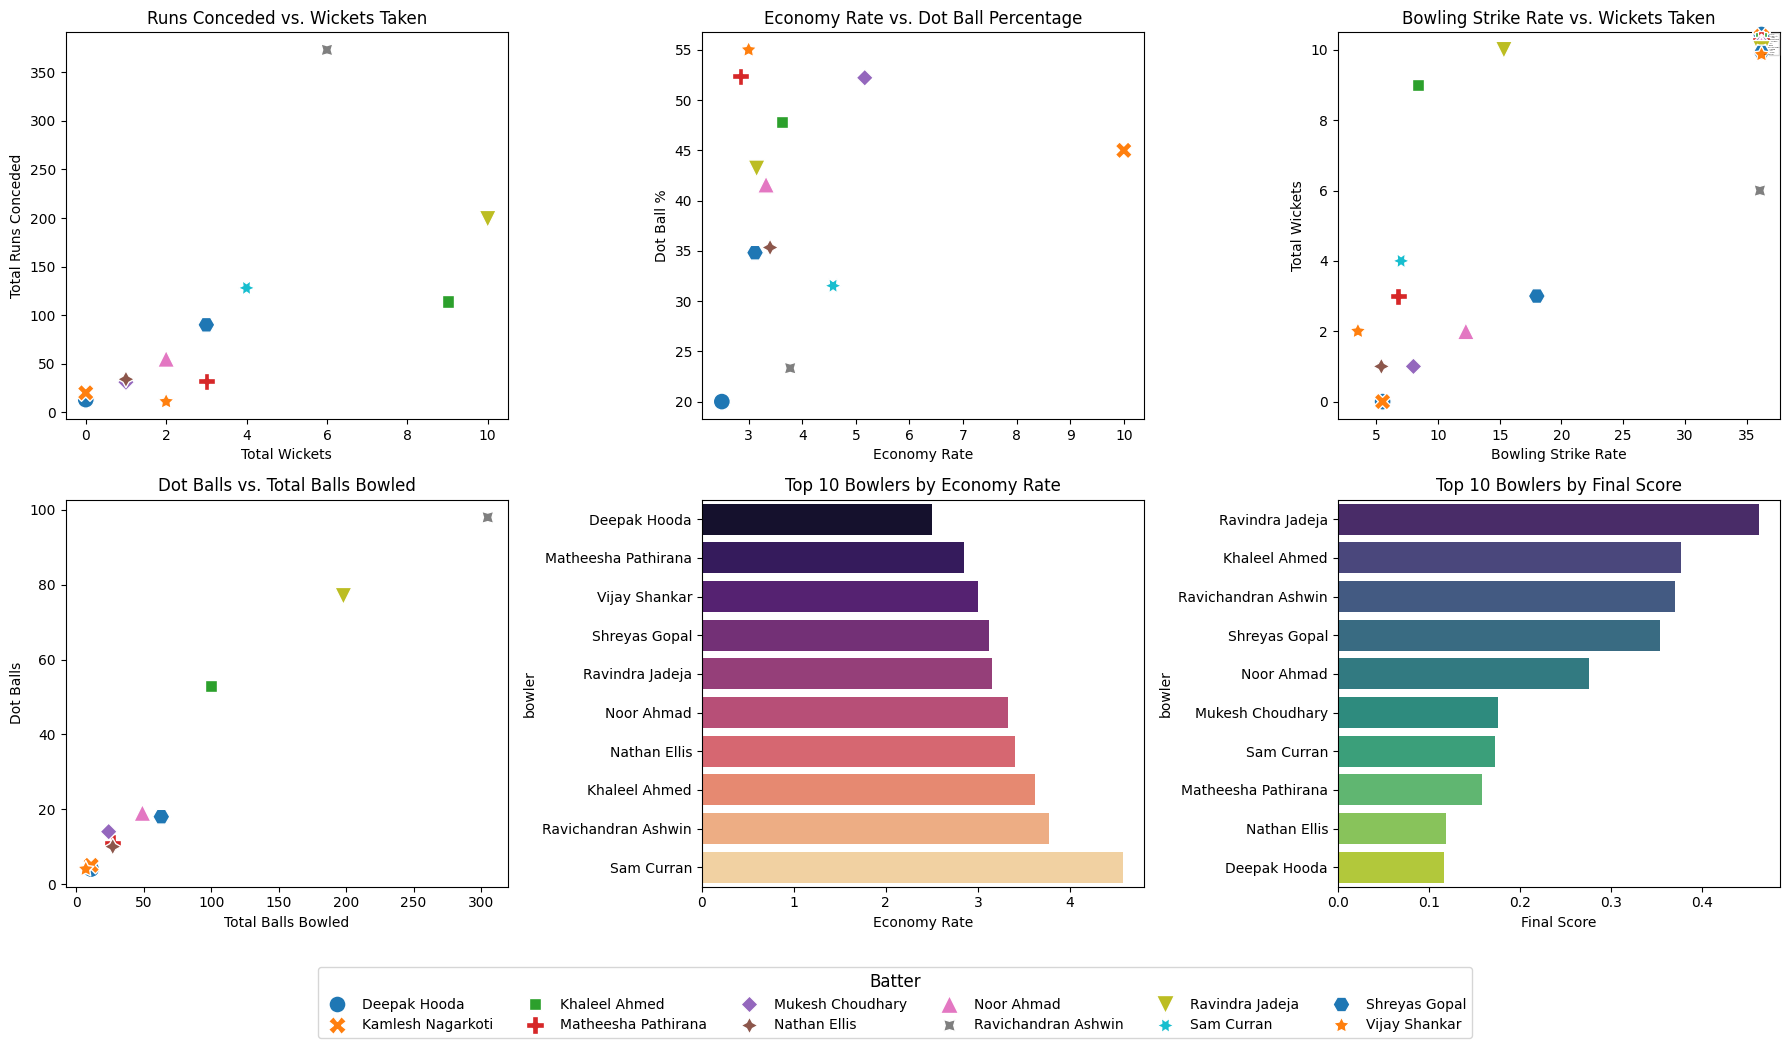

In [ ]:
bowler_level_plots = create_bowler_effectiveness_plots(team_1_bowling_metrics)
bowler_level_plots